In [40]:
%matplotlib inline
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pylab
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import xlrd
rcParams['figure.figsize'] = 10, 5
os.chdir("C:/Users/HYY/Desktop")

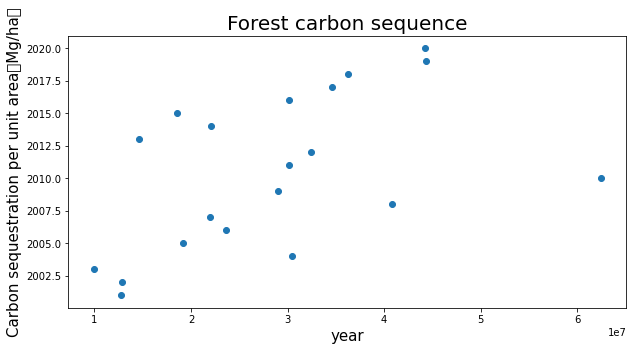

In [46]:
# Preprocessing Input data
data = pd.read_csv('forest carbon sequence.csv',encoding='latin1')
X = data.iloc[:, 4]
Y = data.iloc[:, 1]
plt.xlabel('year',size = 15)
plt.ylabel('Carbon sequestration per unit area（Mg/ha）',size = 15)
plt.title("Forest carbon sequence",size = 20)
plt.scatter(X, Y)
plt.show()

In [50]:
x_mean = np.mean(X)
y_mean = np.mean(Y)

# least squares

# Numerator
num = 0.0
# denominator
d = 0.0

for x_i, y_i in zip(X, Y):
    num += (x_i - x_mean) * (y_i - y_mean)
    d += (x_i - x_mean) **2
    a = num/d # update a
    b = y_mean - a*x_mean  # update b
    y_pred = a*X + b

print(a, b)

2.3163350997727902e-07 2003.8952441118386


C:\ruanjianxiazai\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ruanjianxiazai\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 65289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ruanjianxiazai\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\ruanjianxiazai\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 65289 missing from current font.
  font.set_text(s, 0, flags=flags)


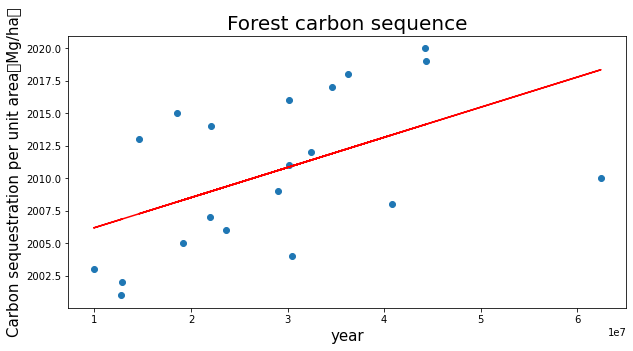

In [51]:
y_pred = a*X + b
plt.scatter(X,Y)
plt.xlabel('year',size = 15)
plt.ylabel('Carbon sequestration per unit area（Mg/ha）',size = 15)
plt.title("Forest carbon sequence",size = 20)
plt.plot(X,y_pred,color="r")
plt.show()

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('forest carbon sequence.csv',encoding='latin1')
X = data.iloc[:, 3]
Y = data.iloc[:, 5]

54.88795768198783
0.07793553456188185


C:\Users\HYY\AppData\Local\Temp/ipykernel_13064/3075183861.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x1 = X[:, np.newaxis]
C:\Users\HYY\AppData\Local\Temp/ipykernel_13064/3075183861.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y1 = Y[:, np.newaxis]
C:\ruanjianxiazai\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ruanjianxiazai\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 65289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ruanjianxiazai\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Gly

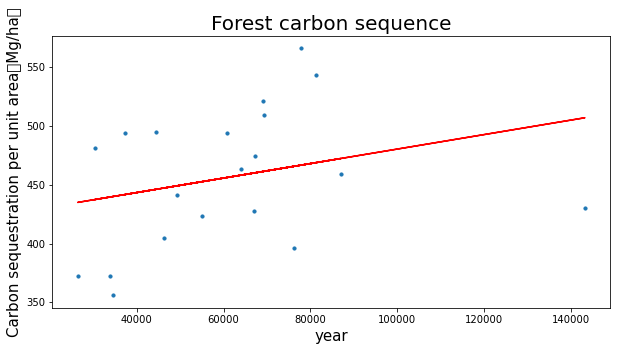

In [53]:
# transforming the data to include another axis
x1 = X[:, np.newaxis]
y1 = Y[:, np.newaxis]

model = LinearRegression()
model.fit(x1, y1)
y_pred = model.predict(x1)

rmse = np.sqrt(mean_squared_error(y1,y_pred))
r2 = r2_score(y1,y_pred)
print(rmse)
print(r2)

plt.xlabel('year',size = 15)
plt.ylabel('Carbon sequestration per unit area（Mg/ha）',size = 15)
plt.title("Forest carbon sequence",size = 20)

plt.scatter(x1, y1, s=10)
plt.plot(x1, y_pred, color='r')
plt.show()

48.34471775502256
0.2846720398919944


C:\Users\HYY\AppData\Local\Temp/ipykernel_13064/289702459.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x2 = X[:, np.newaxis]
C:\Users\HYY\AppData\Local\Temp/ipykernel_13064/289702459.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y2 = Y[:, np.newaxis]
C:\ruanjianxiazai\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ruanjianxiazai\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 65289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ruanjianxiazai\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph

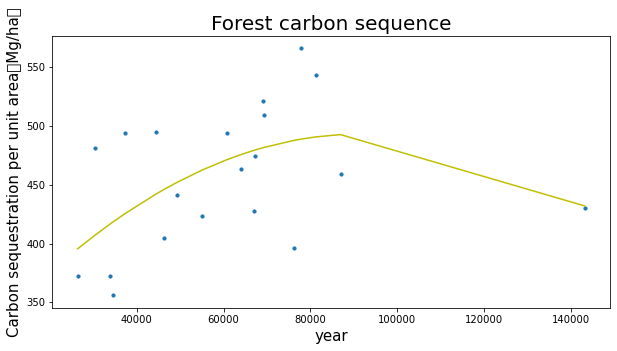

In [54]:
import operator
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# transforming the data to include another axis
x2 = X[:, np.newaxis]
y2 = Y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=2) # A fit of polynomial degree 2
x_poly = polynomial_features.fit_transform(x2)

model = LinearRegression()
model.fit(x_poly, y2)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y2,y_poly_pred))
r2 = r2_score(y2,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x2, y2, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x2,y_poly_pred), key=sort_axis)
x2, y_poly_pred = zip(*sorted_zip)

plt.xlabel('year',size = 15)
plt.ylabel('Carbon sequestration per unit area（Mg/ha）',size = 15)
plt.title("Forest carbon sequence",size = 20)

plt.plot(x2, y_poly_pred, color='y')
plt.show()

48.29418083097378
0.28616678767843795


C:\Users\HYY\AppData\Local\Temp/ipykernel_13064/2044243756.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x3 = X[:, np.newaxis]
C:\Users\HYY\AppData\Local\Temp/ipykernel_13064/2044243756.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y3 = Y[:, np.newaxis]
C:\ruanjianxiazai\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ruanjianxiazai\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 65289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ruanjianxiazai\anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Gly

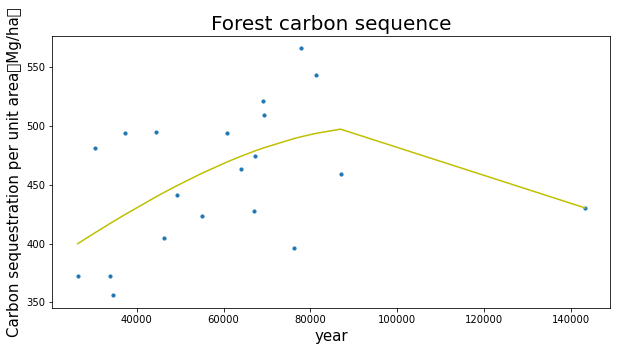

In [55]:
# transforming the data to include another axis
x3 = X[:, np.newaxis]
y3 = Y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=3) # A fit of polynomial degree 3
x_poly = polynomial_features.fit_transform(x3)

model = LinearRegression()
model.fit(x_poly, y3)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y3,y_poly_pred))
r2 = r2_score(y3,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x3, y3, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x3,y_poly_pred), key=sort_axis)
x3, y_poly_pred = zip(*sorted_zip)

plt.xlabel('year',size = 15)
plt.ylabel('Carbon sequestration per unit area（Mg/ha）',size = 15)
plt.title("Forest carbon sequence",size = 20)


plt.plot(x3, y_poly_pred, color='y')
plt.show()